# TELECOMMUNICATION_CUSTOMER_CHURN_EDA

## Read CSV File

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Telco_Customer_Churn_Dataset  (3).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understand the Dataset & Data Cleaning

In [41]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

df = df.dropna()

df = df.drop_duplicates()

print("Cleaning complete. Data shape:", df.shape)

print("First 10 rows of the data:")
print(df.head(10))

print("\nData types of each column:")
print(df.dtypes)

print("\nMissing values count:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

Cleaning complete. Data shape: (7032, 24)
First 10 rows of the data:
   customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      multiplelines internetservice onlinesecurity

## Exploratory Data Analysis(EDA)

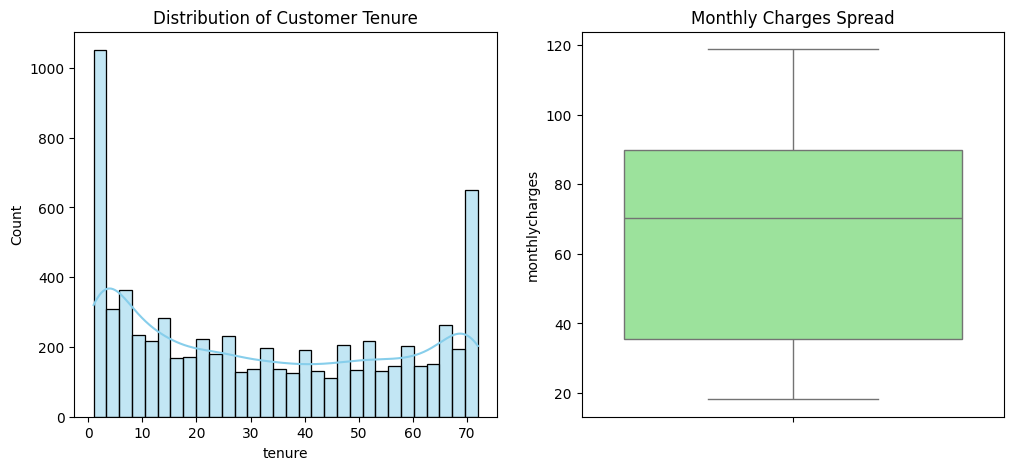

In [42]:
plt.figure(figsize=(12, 5))

# Tenure distribution
plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Tenure')

# Monthly Charges box plot (helps see outliers)
plt.subplot(1, 2, 2)
sns.boxplot(y=df['monthlycharges'], color='lightgreen')
plt.title('Monthly Charges Spread')
plt.show()

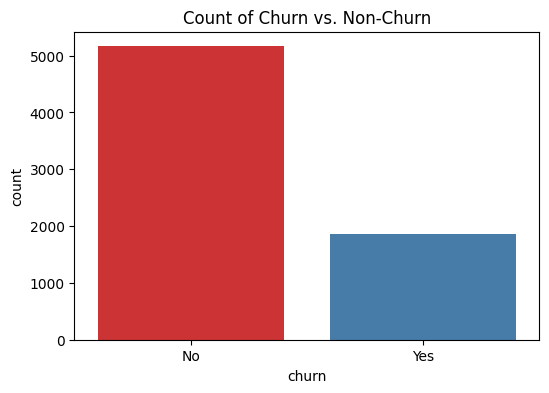

In [14]:
#Analyze Churn rates
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn', hue='churn', palette='Set1', legend=False)
plt.title('Count of Churn vs. Non-Churn')
plt.show()

## Customer Segmentation Visualization

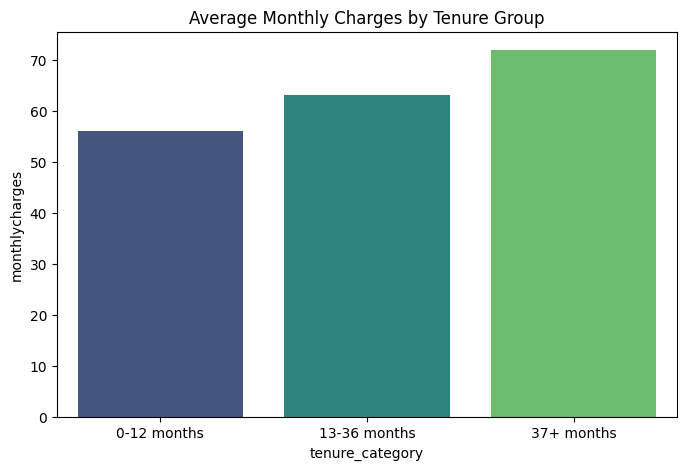

In [16]:
# Clustered bar chart for average monthly charges
plt.figure(figsize=(8, 5))

# FIX: Added hue='tenure_category' and legend=False
bar = sns.barplot(x='tenure_category', y='monthlycharges',
                  hue='tenure_category', data=avg_charges,
                  palette='viridis', legend=False)

plt.title('Average Monthly Charges by Tenure Group')
# ... rest of the code for labels ...
plt.show()

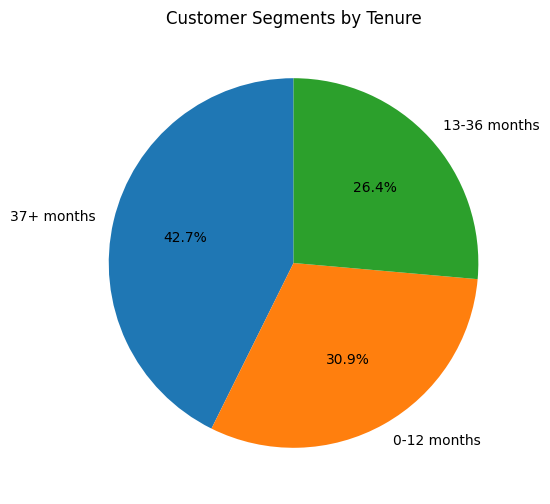

In [19]:
# Pie chart for tenure distribution
tenure_counts = df['tenure_category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segments by Tenure')
plt.show()



## Advanced Analysis

Text(0.5, 1.0, 'Churn Rate: Non-Senior vs Senior')

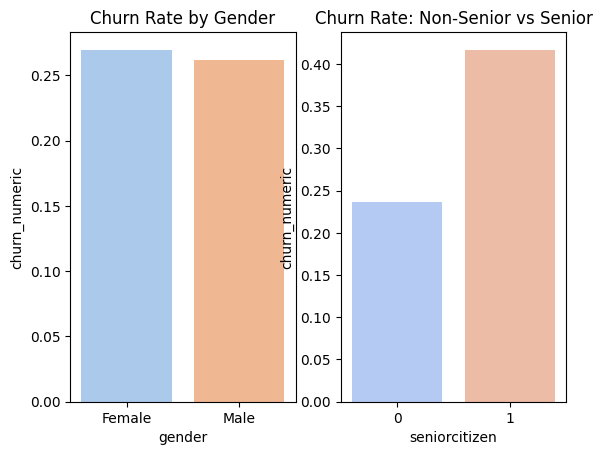

In [33]:
# Churn Rate by Gender
plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='churn_numeric', hue='gender',
            data=df, errorbar=None, palette='pastel', legend=False)
plt.title('Churn Rate by Gender')

# Churn Rate by Senior Citizen
plt.subplot(1, 2, 2)
sns.barplot(x='seniorcitizen', y='churn_numeric', hue='seniorcitizen',
            data=df, errorbar=None, palette='coolwarm', legend=False)
plt.title('Churn Rate: Non-Senior vs Senior')

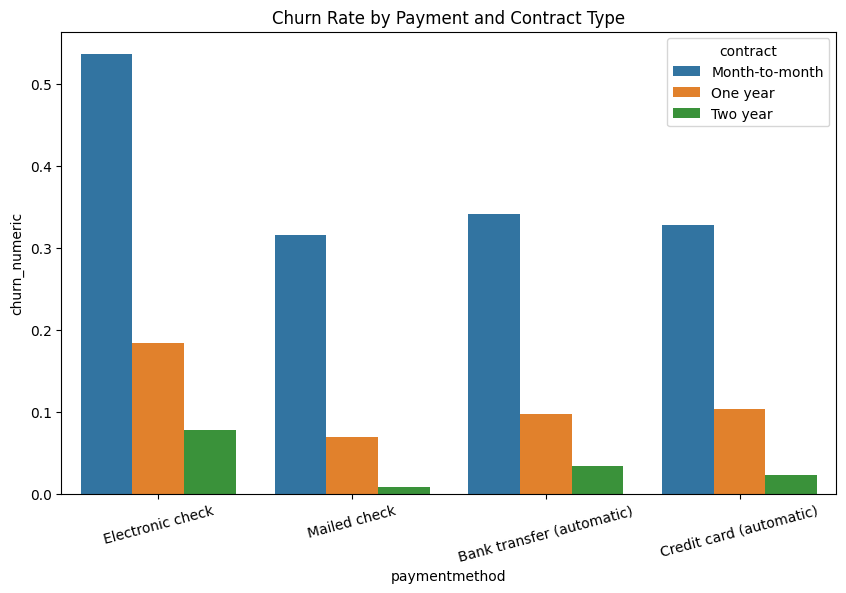

In [36]:
# 2. Churn rate by Payment Method and Contract
plt.figure(figsize=(10, 6))
sns.barplot(x='paymentmethod', y='churn_numeric', hue='contract',
            data=df, errorbar=None)

plt.xticks(rotation=15)
plt.title('Churn Rate by Payment and Contract Type')
plt.show()

## Trend and Lifecycle Analysis

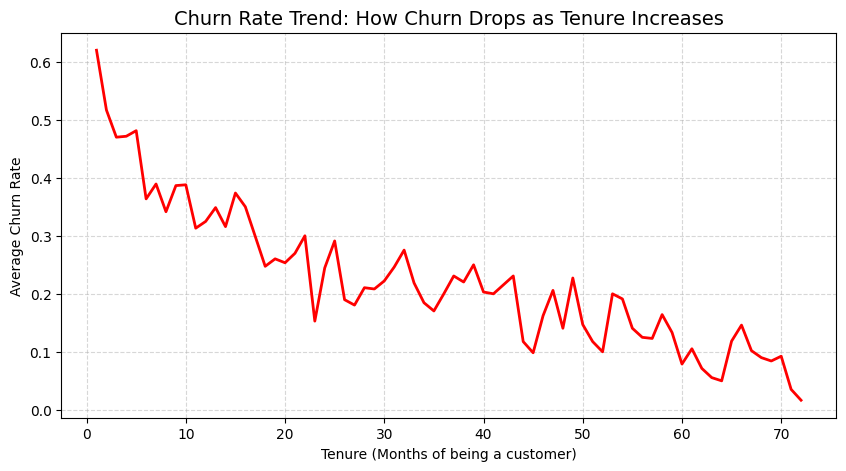

In [43]:
# Visualize the Churn Rate "Trend" over months
# We calculate the average churn for every single month of tenure
churn_trend = df.groupby('tenure')['churn_numeric'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=churn_trend, x='tenure', y='churn_numeric', color='red', linewidth=2)

plt.title('Churn Rate Trend: How Churn Drops as Tenure Increases', fontsize=14)
plt.xlabel('Tenure (Months of being a customer)')
plt.ylabel('Average Churn Rate')
plt.grid(True, linestyle='--', alpha=0.5) # Adding a grid makes it easier to read
plt.show()



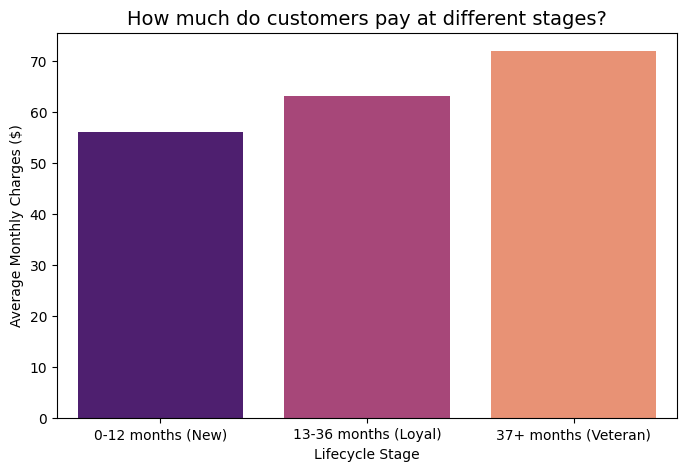

In [40]:
# Visualize Average Charges by Lifecycle Stage
plt.figure(figsize=(8, 5))
sns.barplot(x='lifecycle_stage', y='monthlycharges', hue='lifecycle_stage',
            data=df, errorbar=None, palette='magma',
            legend=False,
            order=['0-12 months (New)', '13-36 months (Loyal)', '37+ months (Veteran)'])

plt.title('How much do customers pay at different stages?', fontsize=14)
plt.ylabel('Average Monthly Charges ($)')
plt.xlabel('Lifecycle Stage')
plt.show()